In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from scikitplot.metrics import plot_confusion_matrix 

In [2]:
normal_learning_results = np.array(pickle.load(open("results/normal_learning_results.data", "rb")))
normal_learning_predictions = pickle.load(open("results/normal_learning_predictions.data", "rb"))
transfer_learning_results = np.array(pickle.load(open("results/transfer_learning_results.data", "rb")))
transfer_learning_predictions = pickle.load(open("results/transfer_learning_predictions.data", "rb"))

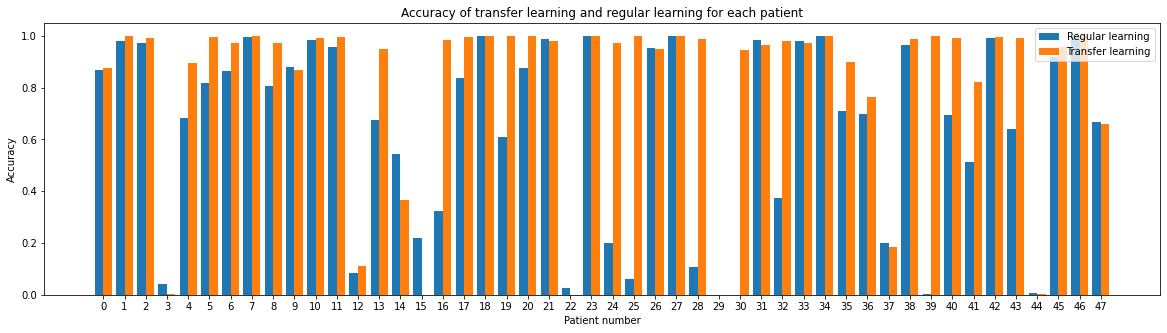

In [3]:
normal_accuracy = normal_learning_results[:,1]
transfer_accuracy = transfer_learning_results[:,1]

plt.figure(figsize=(20, 5))
ind = np.arange(normal_accuracy.shape[0])
bar_width = 0.4
plt.bar(ind, normal_accuracy, bar_width, label="Regular learning")
plt.bar(ind+bar_width, transfer_accuracy, bar_width, label="Transfer learning")
plt.xticks(ind+bar_width/2, ind)
plt.xlabel("Patient number")
plt.ylabel("Accuracy")
plt.title("Accuracy of transfer learning and regular learning for each patient")
plt.legend()
plt.savefig("figures/accuracy_barplot.png")
plt.show()

In [4]:
normal_accuracy = np.average(normal_learning_results[:,1])
transfer_accuracy = np.average(transfer_learning_results[:,1])
print("Avg. normal learning accuracy", normal_accuracy)
print("Avg. transfer learning accuracy", transfer_accuracy)

Avg. normal learning accuracy 0.6398869768502967
Avg. transfer learning accuracy 0.8122204558749218


In [5]:
normal_learning_predictions[0][0]

array([[ 1.5741906 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.851293  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71997046,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.145826  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.089872  ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [6]:
data = pd.read_pickle("splitted_samples.data")
labels = data["beat_type"].factorize()[1]

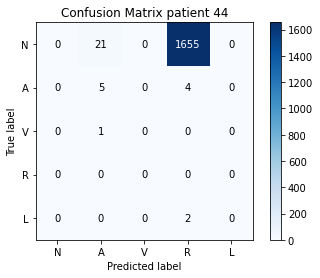

In [7]:
patient = 44

a = np.argmax(transfer_learning_predictions[patient][0], axis=1)
b = np.squeeze(transfer_learning_predictions[patient][1])

#     plt.title(f"Regular p {i}")
plot_confusion_matrix(a, b)
newlabels = labels[plt.xticks()[0]]
plt.title("Confusion Matrix patient " + str(patient))
plt.xticks(np.arange(newlabels.shape[0]), newlabels)
plt.yticks(np.arange(newlabels.shape[0]), newlabels)
plt.savefig(f"figures/cm_p{patient}")

plt.show()

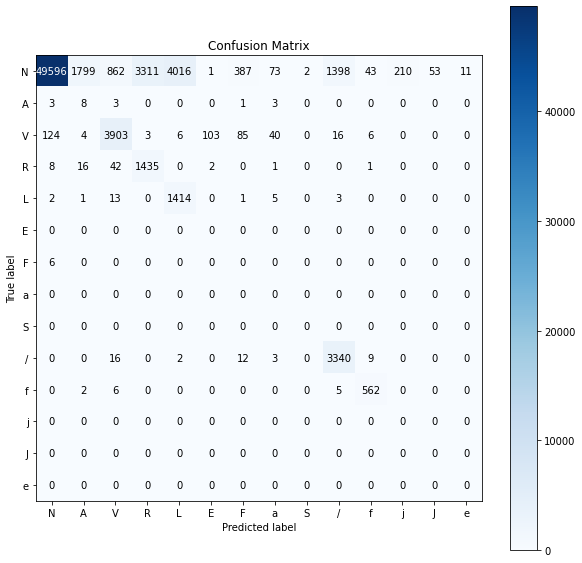

In [14]:
preds_y = []
labels_y = []
for predictions, trues in transfer_learning_predictions:
    for row in range(predictions.shape[0]):
        preds_y.append(predictions[row])
        labels_y.append(trues[row])

preds_y = np.argmax(np.array(preds_y), axis=1)
labels_y = np.squeeze(np.array(labels_y))

plot_confusion_matrix(preds_y, labels_y, figsize=(10,10))


newlabels = labels[plt.xticks()[0]]
plt.xticks(np.arange(newlabels.shape[0]), newlabels)
plt.yticks(np.arange(newlabels.shape[0]), newlabels)
plt.savefig("figures/big_confusion_boi.png")
plt.show()